# Análise de portfólios com Python

Quando falamos de investimento, falamos de uma alocação e aplicação de recursos, tempo e esforço para que algo seja obtido em retorno. Em finanças o retorno nada mais é do que *mais dinheiro*, ou seja, dinheiro gera mais dinheiro. Uma das formas mais comuns, porém complexas, de investimento é aquele aplicado no mercado financeiro, onde o dinheiro é aplicado em  ativos de empresas listas na Bolsa de Valores (como ações, dívida de empresas, fundos, etc.). Quando se aplica dinheiro nesse mercado, geralmente, investe-se em várias empresas e esse conjunto dar-se o nome de carteira ou portfólio.

Um porfólio pode conter ações, títulos de renda, moeda e outros produtos financeiros. A ideia dessa ferramenta financeira é obter um investimento que traga um retorno com o menor risco possível. Por exemplo, se um investidor aplica seu dinheiro em ações de uma empresa de um setor da economia e por algum motivo (geralmente recessões) esse setor tem um desempenho ruim, essa empresa em que foi aplicado o terá uma queda nos preços de suas ações, gerando um prejuízo para quem investiu nela. Então entra a ideia da carteira ou portfólio: ao invés de investir em apenas um ativo e ter uma alta probabilidade de fracasso, investi-se em vários ativos e caso um ativo tenha um baixo retorno e uma perda alta, os outros ativos poderão absorver ou anular essa perda. Em utras palavras, tenta-se otimizar a taxa global de retorno.

OBS: Risco em finanças seria a possibilidade de um investimento dar um retorno abaixo do esperado ou de se perder tudo que foi investido. 

Em tese não é tão trivial identificar os melhores ativos e sua melhores combinações para obter um portfólio ótimo, pois é necessário analisar o mercado, setores, empresas, qual o retorno esperado, quais os melhores ativos, em quanto tempo se deseja reaver o investimento, se é um investimento que foca em dividendos ou na venda futura, a situação macroeconômica, etc. Não existem limites de ativos de uma carteira, mas, geralmente, aconselha-se que uma carteira tenha de 10 a 15 ativos.

Aqui nesse projeto irei aplicar alguns métodos de finanças em *Python* para identificar a carteira ótima para um conjunto de ações de empresas brasileiras listadas na Bolsa Brasileira (BOVESPA) e essas empresas compõem o Índice BOVESPA (ou iBOVESPA). São grandes empresas de alguns setores da economia brasileira. Analisarei os preços de fechamento ajustado diários a partir do ano de 2013.

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb

## Dados

Vamos extrair do *site Yahoo! Finance* os dados de 11 empresas brasileiras, que são: 

1) Setor bancário : Banco Bradesco (*BBDC4.SA*) e Itaú Unibanco (*ITSA4.SA*);

2) Setor elétrico : EDP - Energias do Brasil (*ENBR3.SA*) e Cemig (*CMIG4.SA*)

3) Gás e Petróleo : Petrobras (*PETR4.SA*);

4) Telecomunicações :  Oi (*OIBR4.SA*) e Telefônica (*VIVT4.SA*);

5) Alimentos :  JBS (*JBSS3.SA*);

6) Químico : Braskem (*BRKM5.SA*)

7) Siderurgia  :Usiminas (*USIM5.SA*);

8) Comércio : Lojas Americanas (*LAME4.SA*).

Agora iremos extrair os dados com o *pandas_datareader* e utilizando um *for loop*.

In [2]:
tickers=['BBDC4.SA','PETR4.SA','ITSA4.SA','OIBR4.SA','VIVT4.SA','BRKM5.SA','CMIG4.SA','JBSS3.SA','USIM5.SA',
         'LAME4.SA','ENBR3.SA']
newdata=pd.DataFrame()
for t in tickers:
    newdata[t]=wb.DataReader(t,data_source='yahoo',start='2019-1-1',end='2019-12-31')['Adj Close']

Vamos visualizar as 10 primeiras linhas da base de dados gerada.

In [3]:
newdata.head(10)

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
Date,,,,,,,,,,,
2019-01-02,31.147285,23.284786,11.501853,1.30,40.703033,43.746208,12.662499,11.766559,9.508233,19.293280,13.713815
2019-01-03,31.461479,23.855778,11.601870,1.47,41.065376,44.008808,12.396806,11.952243,9.303650,19.234570,14.284417
2019-01-04,31.214666,23.923521,11.565503,1.45,40.979103,43.519821,12.272809,12.264977,9.849203,18.990026,14.390800
2019-01-07,31.584969,24.300957,11.556408,1.43,41.324192,43.211941,11.909762,11.834969,9.868688,19.623545,13.974936
2019-01-08,31.777821,24.155787,11.710979,1.40,41.419083,43.184772,11.847810,12.020654,9.592963,19.653009,14.023293
2019-01-09,32.325611,24.659035,11.865549,1.43,42.048885,43.474541,12.033757,11.922924,9.907165,20.428913,14.110334
2019-01-10,32.225258,24.446121,11.783719,1.48,41.798691,43.021778,12.246258,11.883833,10.142816,20.409300,14.245731
2019-01-11,32.016960,24.184822,11.638239,1.48,41.237915,43.628483,12.272809,12.196566,9.995534,20.134241,14.303761
2019-01-14,32.395050,24.049332,11.810995,1.42,41.591640,43.719036,12.343704,12.401795,9.691152,20.124485,14.468170


E as 10 últimas linhas.

In [4]:
newdata.tail(10)

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
Date,,,,,,,,,,,
2019-12-13,33.983608,29.568565,13.329904,1.27,51.610298,29.129999,11.908875,25.060532,9.164668,26.725149,20.072456
2019-12-16,33.387913,29.006388,13.203416,1.25,51.885166,28.639999,12.256191,24.923697,9.035868,26.485283,20.004515
2019-12-17,34.003139,29.440350,13.456393,1.25,52.105049,28.459999,12.338500,24.425222,9.164668,25.855635,19.897745
2019-12-18,34.950382,30.120882,13.592611,1.25,52.279133,28.770000,12.402446,25.295109,9.164668,25.685728,20.111280
2019-12-19,35.594894,30.189920,13.602340,1.24,52.444050,28.010000,12.512159,25.656748,9.234022,25.835646,20.538355
2019-12-20,35.340790,29.844723,13.475850,1.23,53.012104,28.379999,12.475524,25.412397,9.243930,26.125483,20.742186
2019-12-23,35.558640,30.081429,13.573150,1.23,53.488541,29.250000,12.521295,25.725164,9.442085,26.385338,20.878073
2019-12-26,36.004234,30.485802,13.806667,1.24,53.955807,30.170000,12.767806,25.891323,9.442085,26.635201,21.140141
2019-12-27,35.865608,30.517742,13.748287,1.24,53.580154,30.440001,12.767806,25.803356,9.343008,26.075512,21.091608


Informações sobre a nossa base.

Todos os dados são do tipo *float* e a coluna *VIVT4.SA* possui 4 valores ausentes.

In [5]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2019-01-02 to 2019-12-30
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BBDC4.SA  247 non-null    float64
 1   PETR4.SA  247 non-null    float64
 2   ITSA4.SA  247 non-null    float64
 3   OIBR4.SA  247 non-null    float64
 4   VIVT4.SA  247 non-null    float64
 5   BRKM5.SA  247 non-null    float64
 6   CMIG4.SA  247 non-null    float64
 7   JBSS3.SA  247 non-null    float64
 8   USIM5.SA  247 non-null    float64
 9   LAME4.SA  247 non-null    float64
 10  ENBR3.SA  247 non-null    float64
dtypes: float64(11)
memory usage: 23.2 KB


Confirmando o que vimos anteriormente, temos 4 valores ausentes.

In [6]:
newdata.isna().sum()

BBDC4.SA    0
PETR4.SA    0
ITSA4.SA    0
OIBR4.SA    0
VIVT4.SA    0
BRKM5.SA    0
CMIG4.SA    0
JBSS3.SA    0
USIM5.SA    0
LAME4.SA    0
ENBR3.SA    0
dtype: int64

Vamos substituir esses valores ausentes pela média da sua coluna.

In [7]:
newdata['VIVT4.SA']=newdata['VIVT4.SA'].fillna(newdata['VIVT4.SA'].mean())

Agora vemos que não temos valores ausentes.

In [8]:
newdata.isna().sum()

BBDC4.SA    0
PETR4.SA    0
ITSA4.SA    0
OIBR4.SA    0
VIVT4.SA    0
BRKM5.SA    0
CMIG4.SA    0
JBSS3.SA    0
USIM5.SA    0
LAME4.SA    0
ENBR3.SA    0
dtype: int64

Nossa base tem 1931 observações e 11 colunas.

In [9]:
newdata.shape

(247, 11)

Tabela estatística da base dados.

In [10]:
newdata.describe()

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,33.068797,26.557699,12.103004,1.515101,45.801686,36.664876,12.692149,22.097006,8.626404,18.451444,18.017645
std,1.597052,1.724097,0.786674,0.167570,3.993627,7.929784,0.604960,5.911343,0.861708,2.721246,1.406557
min,29.520483,23.284786,10.439577,1.120000,39.823067,25.404394,11.415400,11.766559,6.935424,14.319851,13.713815
25%,31.959093,25.310676,11.570132,1.380000,41.712412,29.213224,12.268384,15.709918,7.950969,16.185987,17.018188
50%,32.971069,26.422464,12.050067,1.530000,46.387882,34.138367,12.694952,22.959124,8.608921,18.700306,18.383575
75%,34.294918,27.386546,12.687346,1.650000,49.196077,44.085777,13.168512,27.279230,9.367777,19.883820,18.893151
max,36.751427,30.544981,13.806667,1.880000,53.955807,50.736904,14.074989,32.449677,10.722125,26.725149,21.450739


Por fim, vamos plotar as 11 séries de preços de fechamento ajustado.

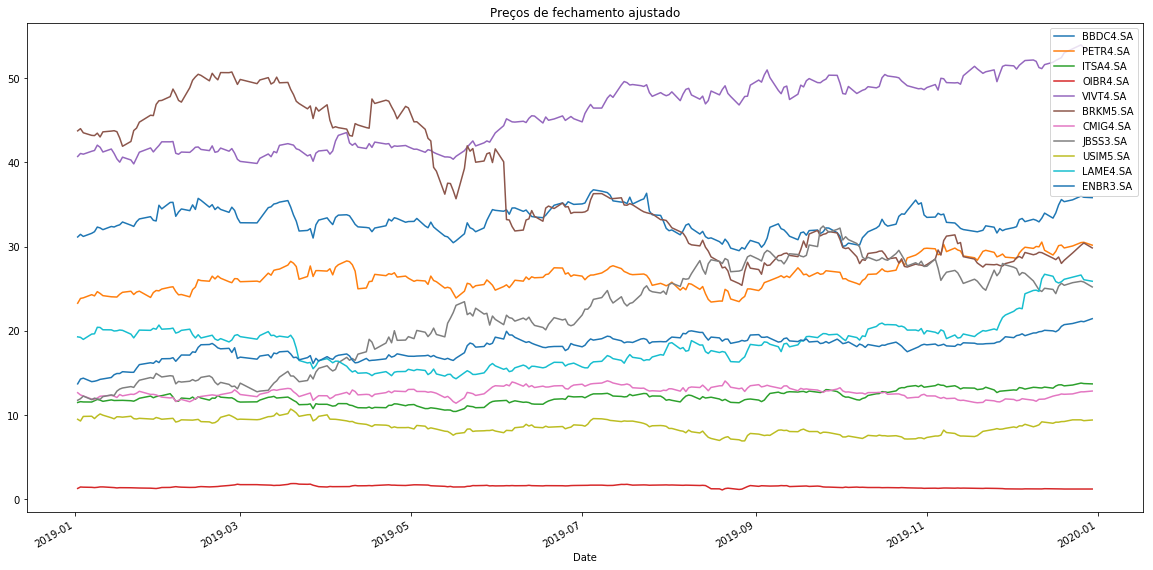

In [11]:
newdata.plot(figsize=(20,10),title='Preços de fechamento ajustado');

#### Normalizando os dados

Para melhor comparação dos dados podemos normalizá-los e deixá-los na mesma escala e, assim, eles terão o mesmo ponto de partida.

In [12]:
normal=(newdata/newdata.iloc[0])*100

Abaixo podemos ver essa nova base de dados, onde as colunas iniciam com o valor 100.

In [13]:
normal.head()

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
Date,,,,,,,,,,,
2019-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2019-01-03,101.008735,102.452209,100.869569,113.076929,100.890211,100.600280,97.901728,101.578067,97.848358,99.695697,104.160786
2019-01-04,100.216330,102.743142,100.553390,111.538469,100.678253,99.482499,96.922484,104.235885,103.586050,98.428193,104.936524
2019-01-07,101.405205,104.364096,100.474314,110.000000,101.526074,98.778711,94.055383,100.581393,103.790973,101.711814,101.904078
2019-01-08,102.024366,103.740641,101.818190,107.692310,101.759204,98.716607,93.566123,102.159468,100.891124,101.864534,102.256687


Visualizando os retornos.

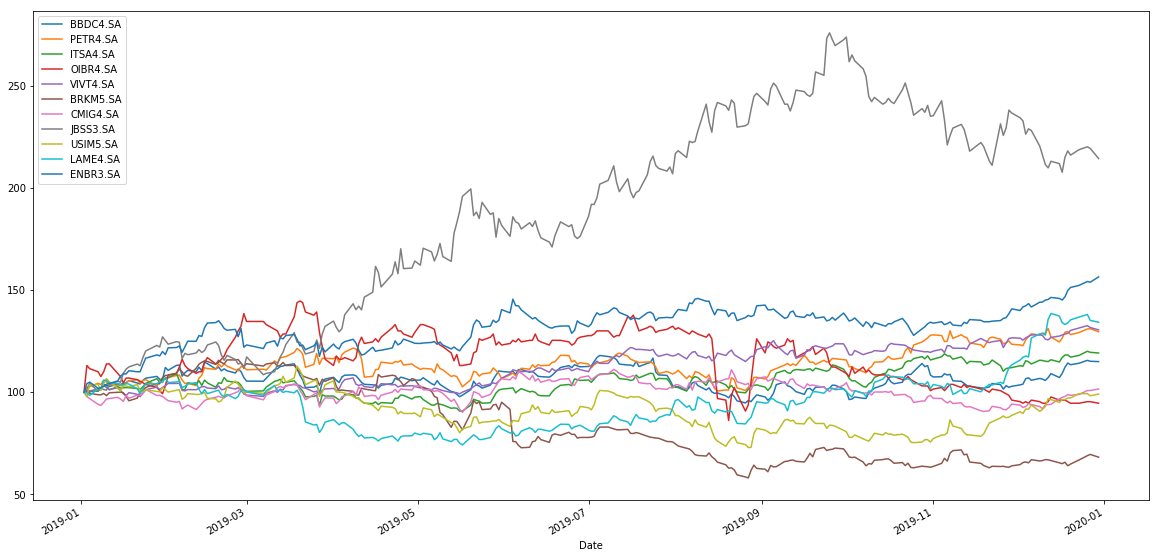

In [14]:
normal.plot(figsize=(20,10));

#### Taxa de retorno

Vamos agora gerar e plotar as taxas de retorno diária de cada uma dessas séries.

In [15]:
retorno = ((newdata/newdata.shift(1))-1)

Base de retornos.

In [16]:
retorno.head()

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
Date,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.010087,0.024522,0.008696,0.130769,0.008902,0.006003,-0.020983,0.015781,-0.021516,-0.003043,0.041608
2019-01-04,-0.007845,0.002840,-0.003135,-0.013605,-0.002101,-0.011111,-0.010002,0.026165,0.058639,-0.012714,0.007448
2019-01-07,0.011863,0.015777,-0.000786,-0.013793,0.008421,-0.007074,-0.029581,-0.035060,0.001978,0.033361,-0.028898
2019-01-08,0.006106,-0.005974,0.013375,-0.020979,0.002296,-0.000629,-0.005202,0.015690,-0.027939,0.001501,0.003460


Gráfico dos retornos diários.

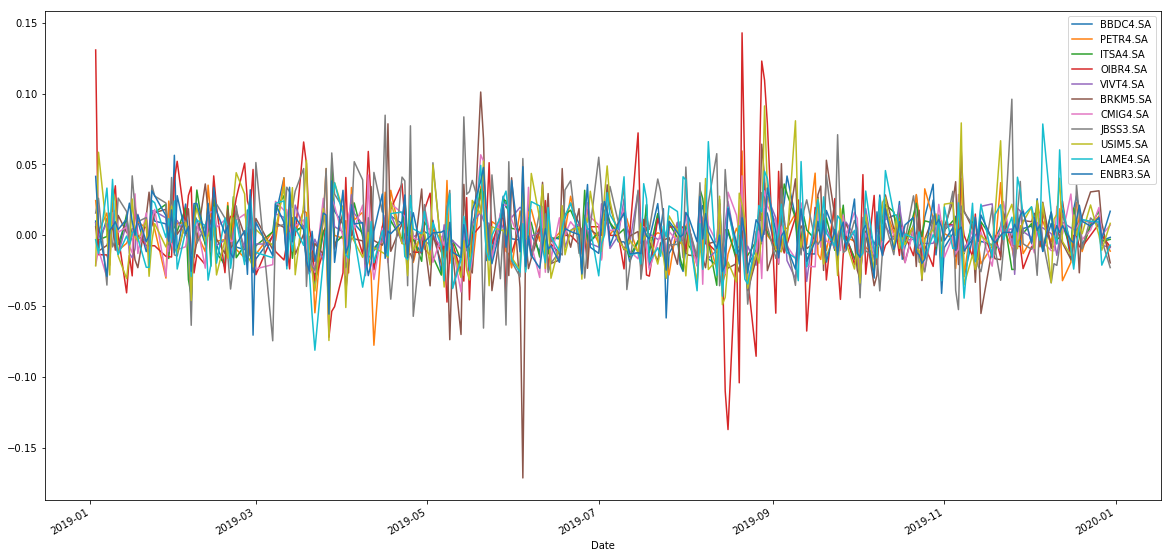

In [17]:
retorno.plot(figsize=(20,10));

Agora vamos definir os pesos ou as proporções que cada ação terá na nossa carteira. De início irei dar um peso igual a cada ação, como temos 11 ações, então será 1/11.

In [18]:
weight=np.array([1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11])
weight

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

Agora vamos ver o retorno anual de cara uma das ações que selecionamos, em percentual.

In [19]:
retorno_anual=retorno.mean()*247
retorno_anual*100

BBDC4.SA    17.354263
PETR4.SA    30.017512
ITSA4.SA    20.358329
OIBR4.SA     6.116371
VIVT4.SA    28.439767
BRKM5.SA   -30.824081
CMIG4.SA     5.251135
JBSS3.SA    86.224490
USIM5.SA     5.588819
LAME4.SA    35.226640
ENBR3.SA    48.297061
dtype: float64

Agora podemos gerar o retorno médio da nossa carteira.

O valor de 22.913% significa que se eu investisse 100.000,00 reais no início do ano de 2019, então no final do ano eu teria o montante de 122.913,66 reais. Aparenta ser um retorno interessante bem interessante, se compararmos com outras modalidades de investimentos, como títulos do governo que tiveram uma queda na taxa de juros.

In [20]:
np.dot(retorno_anual,weight)*100

22.91366404143457

Vimos também que há uma ação que teve o retorno negativo, então podemos excluí-la do nosso portfólio e fazer novamente esse cálculo. 

In [21]:
retorno2=retorno.drop(['BRKM5.SA'],axis=1)
retorno_anual2=retorno2.mean()*247

redefinimos os pesos.

In [22]:
weight2=np.array([1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10])
weight2

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

Temos agora uma taxa de retorno anual maior, que a anterior. A exclusão dessa ação daria um aumento de 5373,78 reais ao meu investimento.

In [23]:
np.dot(retorno_anual2,weight2)*100

28.28743851196127

Mas será que poderíamos ter um retorno maior se alterássemos os pesos ?

Farei um exemplo alterando esses valores e dando mais pesos para as ações de maiores retornos e menores para as de menores retornos.

Redefiní novamente os pesos (de forma que sempre tenha o valor somado de 1).

In [24]:
weight3=np.array([0.75/10,1/10,1/10,0.25/10,1/10,0.25/10,3/10,0.25/10,1/10,1.5/10])
weight3

array([0.075, 0.1  , 0.1  , 0.025, 0.1  , 0.025, 0.3  , 0.025, 0.1  ,
       0.15 ])

Agora tenho uma taxa de 46.24%, o que daria um retorno de 46.241,61 reais de um investimento de 100.000,00 reais. Um acréscimo de 17.954,61 reais em relação para com a taxa de retorno anterior.

In [25]:
np.dot(retorno_anual2,weight3)*100

46.241608556716706

Ou seja, podemos fazer esse processo várias vezes e encontrar uma taxa de retorno ótima para a nossa carteira, além de retirarmos e inserirmos em nossa carteira outros ativos.

Podemos comparar o retorno da nossa carteira com o índice da BOVESPA, pois ela é uma composição do preço de várias outras ações. Em outras palavras o índice BOVESPA é uma *proxy* do mercado, então se o retorno da nossa carteira for maior que o retorno do índice BOVESPA, então ela estará superando o mercado.

Vamos extrair os dados para o mesmo períodos dos preços de fechamento.

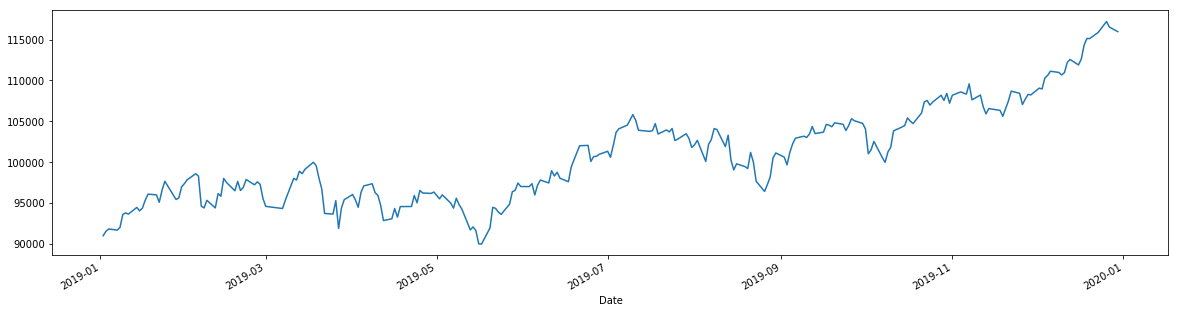

In [26]:
ibovespa=wb.DataReader('^BVSP',data_source='yahoo',start='2019-1-1',end='2019-12-31')['Adj Close']
ibovespa.plot(figsize=(20,5));

Vamos calcular o retorno da iBOVESPA e depois vamos encontar o retorno anual multiplicando pelo número de dias úteis, que é 247.

In [27]:
ibovespa_retorno=(ibovespa/ibovespa.shift(1))-1

Vemos que o retorno foi de quase 26%. Conseguimos superar esse valor excluindo a ação da BRASKEM e depois alterando a proporção das ações que compõem a nossa carteira.

In [28]:
ibovespa_retorno.mean()*247*100

25.87772012764783

Então já poderia-se dar por satisfeito com essa carteira, mas podemos melhorar essa carteira e sua análise.

## Análise de risco da carteira

Existem dois tipos de riscos : 

1) Não diversificável (sistemático): esse risco depende da variância de cada ativo e sempre vai existir (por conta de recessões, redução do consumo das famílias, guerras, eventos naturais e etc.);

2) e o Diversificável (idiossincrático): Trata do risco específico de uma empresa e é impulsionado por eventos da empresa. Esse risco pode ser eliminado se forem feitos investimentos em ativos não correlacionados.

#### Métricas de risco

A melhor forma de analisar o risco de um ativo ou uma carteira de ativos é olhar a sua volatilidade, por meio da variância e o desvio padrão. A ideia é que a carteira renda uma quantia estável ao longo do tempo, então ativos com alta variância não é bem vinda, pois sofrem muitas variações ao longo do tempo e podem acarretar em altas perdas.

Abaixo podemos ver o desvio padrão de cada ação.

In [29]:
risco_anual=retorno.std()*247
risco_anual

BBDC4.SA    4.063967
PETR4.SA    4.433123
ITSA4.SA    3.676997
OIBR4.SA    7.632230
VIVT4.SA    2.893215
BRKM5.SA    6.055442
CMIG4.SA    4.275617
JBSS3.SA    6.915196
USIM5.SA    5.703747
LAME4.SA    5.304179
ENBR3.SA    4.068346
dtype: float64

Vamos agora calcular as métricas de risco desse portfólio.

Vamos utilizar a covariância entre os retornos, que podem ser vistas abaixo.

In [30]:
display(retorno.cov())
display(retorno2.cov())

,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,BRKM5.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
BBDC4.SA,0.000271,0.000143,0.000195,0.000052,0.000080,0.000107,0.000119,0.000079,0.000142,0.000136,0.000105
PETR4.SA,0.000143,0.000322,0.000121,0.000161,0.000058,0.000108,0.000137,0.000051,0.000188,0.000137,0.000081
ITSA4.SA,0.000195,0.000121,0.000222,0.000026,0.000073,0.000097,0.000105,0.000067,0.000099,0.000109,0.000102
OIBR4.SA,0.000052,0.000161,0.000026,0.000955,0.000028,0.000098,0.000061,-0.000038,0.000138,0.000041,0.000043
VIVT4.SA,0.000080,0.000058,0.000073,0.000028,0.000137,0.000030,0.000064,0.000069,0.000046,0.000095,0.000080
BRKM5.SA,0.000107,0.000108,0.000097,0.000098,0.000030,0.000601,0.000078,0.000026,0.000148,0.000093,0.000041
CMIG4.SA,0.000119,0.000137,0.000105,0.000061,0.000064,0.000078,0.000300,0.000075,0.000161,0.000144,0.000141
JBSS3.SA,0.000079,0.000051,0.000067,-0.000038,0.000069,0.000026,0.000075,0.000784,0.000050,0.000088,0.000123
USIM5.SA,0.000142,0.000188,0.000099,0.000138,0.000046,0.000148,0.000161,0.000050,0.000533,0.000186,0.000087
LAME4.SA,0.000136,0.000137,0.000109,0.000041,0.000095,0.000093,0.000144,0.000088,0.000186,0.000461,0.000102


,BBDC4.SA,PETR4.SA,ITSA4.SA,OIBR4.SA,VIVT4.SA,CMIG4.SA,JBSS3.SA,USIM5.SA,LAME4.SA,ENBR3.SA
BBDC4.SA,0.000271,0.000143,0.000195,0.000052,0.000080,0.000119,0.000079,0.000142,0.000136,0.000105
PETR4.SA,0.000143,0.000322,0.000121,0.000161,0.000058,0.000137,0.000051,0.000188,0.000137,0.000081
ITSA4.SA,0.000195,0.000121,0.000222,0.000026,0.000073,0.000105,0.000067,0.000099,0.000109,0.000102
OIBR4.SA,0.000052,0.000161,0.000026,0.000955,0.000028,0.000061,-0.000038,0.000138,0.000041,0.000043
VIVT4.SA,0.000080,0.000058,0.000073,0.000028,0.000137,0.000064,0.000069,0.000046,0.000095,0.000080
CMIG4.SA,0.000119,0.000137,0.000105,0.000061,0.000064,0.000300,0.000075,0.000161,0.000144,0.000141
JBSS3.SA,0.000079,0.000051,0.000067,-0.000038,0.000069,0.000075,0.000784,0.000050,0.000088,0.000123
USIM5.SA,0.000142,0.000188,0.000099,0.000138,0.000046,0.000161,0.000050,0.000533,0.000186,0.000087
LAME4.SA,0.000136,0.000137,0.000109,0.000041,0.000095,0.000144,0.000088,0.000186,0.000461,0.000102
ENBR3.SA,0.000105,0.000081,0.000102,0.000043,0.000080,0.000141,0.000123,0.000087,0.000102,0.000271


Vamos primeiro calcular o portfólio com as 11 ações e com os pesos iguais.

In [31]:
portfolio_var=np.dot(weight, np.dot(retorno.cov()*247,weight))
portfolio_var

0.03104865894352421

In [32]:
portfolio_vol=np.dot(weight, np.dot(retorno.cov()*247,weight))
portfolio_vol**0.5

0.1762062965490286

Vamos agora usar a carteira sem a ação da BRASKEM.

In [33]:
portfolio_var2=np.dot(weight2, np.dot(retorno2.cov()*247,weight2))
portfolio_var2

0.03200825106951827

In [34]:
portfolio_vol2=np.dot(weight2, np.dot(retorno2.cov()*247,weight2))
portfolio_vol2**0.5

0.17890849915394816

E por fim com os pesos alterados.

In [35]:
portfolio_var3=np.dot(weight3, np.dot(retorno2.cov()*247,weight3))
portfolio_var3

0.041104277697758776

In [36]:
portfolio_vol3=np.dot(weight3, np.dot(retorno2.cov()*247,weight3))**0.5
portfolio_vol3

0.20274189921611857

Vamos agora comparar esses resultados: vemos que a carteira 1 não superou o índice BOVESPA, mas as outras duas carteiras conseguiram superar. Mesmo a variância da Carteira 2 e Carteira 3 estando muito próximas e a volatilidade da carteira 3 sendo um pouco maior, mas o seu retorno da Carteira 3 é bem maior.


|                     ||   Retorno   || Retorno IBOVESPA  ||  Variância  ||  Volatilidade  ||
|:-------------------:||:-----------:||:------------:||:----------------:||:----------------------:||
|Carteira 1           || 22.91%      ||  25.87%      ||    0.03104       ||     0.1762      ||
|Carteira 2           || 28.28%      ||  25.87%      ||    0.03200       ||     0.1789    ||
|Carteira 3           || 46.24%      ||  25.87%      ||    0.04110       ||     0.2027     ||


Agora, com a Carteira 2, podemos identificar qual o risco que é diversificável e o risco não diversificável.

O Risco Total de uma carteira é dado pela soma do **Risco Diversificável** e do **Risco Não Diversificável** (*RT = RD + RND*). Sabemos que o risco total é a variância da carteira, já o **Risco Diversificável** é o **Risco Total** menos a variância de cada ativo multiplicado por seu peso ao quadrado, ou seja,

Variância do Portfólio = $(w_1\sigma_1 + w_2\sigma_2 + \dots + w_n\sigma_n)^2$ dado que $\sum_1^{i=n} w_i = 1$.

Vamos primeiro definir a variância de cada ativo da carteira.

In [37]:
risco_var=retorno2.var()*247
risco_var

BBDC4.SA    0.066866
PETR4.SA    0.079565
ITSA4.SA    0.054738
OIBR4.SA    0.235834
VIVT4.SA    0.033889
CMIG4.SA    0.074012
JBSS3.SA    0.193603
USIM5.SA    0.131711
LAME4.SA    0.113904
ENBR3.SA    0.067010
dtype: float64

Podemos agora calcular o **risco diversificável**.

In [38]:
risco_divers=portfolio_var3-(weight3[0]**2*risco_var[0])-(weight3[1]**2*risco_var[1])-(weight3[2]**2*risco_var[2])
-(weight3[3]**2*risco_var[3])-(weight3[4]**2*risco_var[4])-(weight3[5]**2*risco_var[5])-(weight3[6]**2*risco_var[6])
-(weight3[7]**2*risco_var[7])-(weight3[8]**2*risco_var[8])-(weight3[9]**2*risco_var[9])

risco_divers

0.03938512626907789

E o **risco não diversificável**.

In [39]:
risco_n_dir = (weight3[0]**2*risco_var[0])+(weight3[1]**2*risco_var[1])+(weight3[2]**2*risco_var[2])
+(weight3[3]**2*risco_var[3])+(weight3[4]**2*risco_var[4])+(weight3[5]**2*risco_var[5])+(weight3[6]**2*risco_var[6])
+(weight3[7]**2*risco_var[7])+(weight3[8]**2*risco_var[8])+(weight3[9]**2*risco_var[9])

risco_n_dir

0.0017191514286808841

## Fronteira Eficiente de Markowitz

Vamos agora usar o método criado por Harry Markowitz, método esse que rendeu o Prêmio Nobel na área de economia, por revolucionar a área de gestão de portfólios. Na gestão de portfólios são calculadas séries de suposições de risco, retorno esperado, correlação e covariância. Como foi feito anteriormente foram montados 3 possíveis portfólios, porém outras alocações podem ser formadas para maximizar o retorno e minimizar o risco e essas outras possíveis alocações formam o que é chamada de **Fronteira Eficiente**. A suposições por detrás dessa teoria é que o investidor quer o maior retorno tolerando algum grau de risco. Uma vantagem desse método é que ele possibilita que a carteira gerada seja bastante diversificada, o que reduz o risco por meio da redução da volatilidade.

Antes de iniciar a criação da Fronteira Eficiente, iremos gerar pesos de forma aleatória e que esses pesos tenham valor somado igual a um (1).

In [40]:
pesos = np.random.random(10)
pesos /= np.sum(pesos)
pesos

array([0.15367377, 0.05262123, 0.10956146, 0.10357215, 0.15379734,
       0.122209  , 0.07791075, 0.00192312, 0.08919459, 0.1355366 ])

Soma dos pesos.

In [41]:
pesos.sum()

0.9999999999999998

Vamos calcular o retorno esperado do nosso portfólio com os pesos aleatórios.

Vemos que temos um retorno de 23%.

In [42]:
retorno2 = np.log(newdata/newdata.shift(1))
retorno2=retorno2.drop(['BRKM5.SA'],axis=1)

In [43]:
np.sum(pesos*retorno2.mean())*247*100

23.868859176959653

Agora a variância esperada do nosso portfólio e a volatilidade esperada, para vermos quais serão nossos valores com os pesos.

In [44]:
np.dot(pesos.T,np.dot(retorno2.cov(),pesos))

0.00012078893469616808

In [45]:
np.dot(pesos.T,np.dot(retorno2.cov(),pesos))**0.5

0.010990401935150874

Faremos 1000 combinações diferentes dos mesmos ativos.

In [46]:
pfolio_retorno=[]
pfolio_volatilidade=[]

for x in range(10000):
    pesos = np.random.random(10)
    pesos /= np.sum(pesos)
    
    pfolio_retorno.append((np.sum(pesos*retorno2.mean())*247).tolist())
    pfolio_volatilidade.append((np.dot(pesos.T,np.dot(retorno2.cov(),pesos))**0.5).tolist())
    
    pfolio_retorno, pfolio_volatilidade

Iremos plotar esses valores em um gráfico que nos mostrará a nossa **Fronteira Eficiente**. Vamos criar primeiro uma *dataframe* com os dados de retorno e de volatilidade.

In [47]:
portfolio=pd.DataFrame({'Retorno':pfolio_retorno, 'Volatilidade':pfolio_volatilidade})
portfolio.head()

,Retorno,Volatilidade
0,0.195368,0.011202
1,0.294547,0.011780
2,0.194386,0.011420
3,0.309557,0.012991
4,0.295769,0.012194


Abaixo podemos ver as possíveis mil carteiras geradas. O que podemos interpretar é que as carteiras mais eficientes seriam aquelas que estão na fronteira no nosso gráfico, ou seja, na imagem abaixo aquelas carteiras que estiverem mais para fora seriam as mais eficientes.

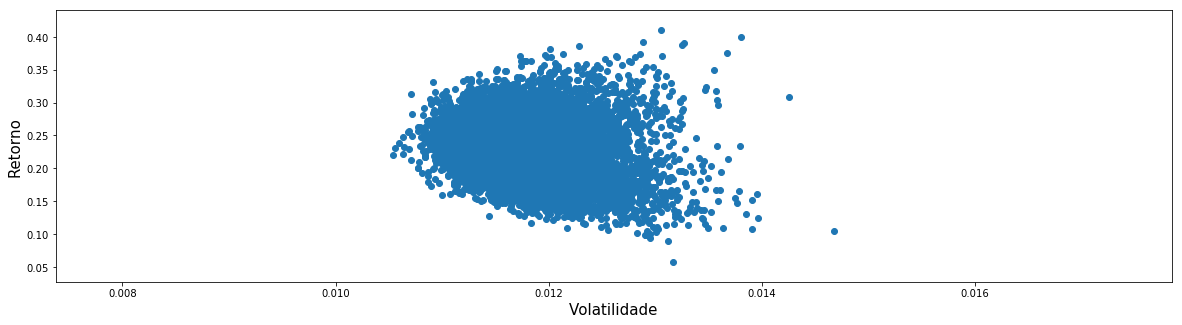

In [48]:
plt.figure(figsize=(20,5))
plt.scatter(portfolio['Volatilidade'],portfolio['Retorno'], cmap='viridis')
#portfolio.plot(x='Volatilidade', y='Retorno', kind='scatter')
plt.xlabel('Volatilidade',size=15)
plt.ylabel('Retorno',size=15);

## Modelo de Precificação de Ativos Financeiros - *CAPM*

Uma outra fórmula de analisar o portfólio é o método chamado *CAPM*. Esse modelo supõe que os investidores são avessos ao risco, preferem retornos mais elevados e dispostos a comprar o portfólio otimizado.

Para isso precisaremos supor a existência de um **portfpolio de mercado** que é uma combinação de todos os investimentos possíveis no mundo (títulos de dívidas e ações). Esse portfólio de mercado tem as seguintes características:

1) retorno superior e otimizado em termos de risco;

2) Não tem risco idissiocrático, apenas sistemático;

3) Está em algum lugar na fronteira eficiente, pois é a carteira mais eficiente.

O modelo *CAPM* pressupõe a existência de um ativo livre de risco ou um investimento de risco zero (na prática esse ativo não existe, por isso a ideia é de um ativo com um risco menor possível, mas com um retorno que também é menor). 

A fórmula do *CAPM* é dada por :

$r_i = r_f + \beta_{im} (r_m - r_f)$, onde

$r_i$ é o retorno esperado de um ativo, $r_f$ é o retorno do ativo livre de risco, $\beta_{im}$ é o $\beta$ entre a ação e o mercado e $r_m$ é o retorno do mercado.

Antes precisaremos calcular o $\beta$ cuja função é dada por $\frac{Cov(r_x,r_m)}{\sigma^2_m}$, onde $\sigma^2_m$ é a variância de mercado. O $\beta$ varia entre -1 e 2, se $\beta$ for menor que um ($\beta < 1$) então a ação desse $\beta$ é uma ação defensiva (perde menos que o mercado); e se estiver acima de 1 ($\beta > 1$), então a ação a qual esse $\beta$ pertence é uma ação agressiva (ganha mais que o mercado).

Também podemos seguir a tabela abaixo que está mais detalhada.


|   $\beta$   ||    Risco          ||  Ativo  ||  Situação em que ocorre ? ||
|:-----------:||:------------:||:----------------------:||:----------------------:||
| Menor que 0 || Menor que o ativo livre de risco      ||      Livre de risco       ||  Caso raro, investimento em ouro ou em outra moeda  ||
|      0      || Não há       ||      Livre de risco       ||  Quando o retorno é igual ao do ativo livre de risco ||
| Menor que   || Baixo       ||      Defensivo       ||  Retorno abaixo do mercado, mas o risco é menor  ||
| Igual a 1   || Médio       ||       Mercado       ||  Retorno igual ao do mercado  ||
| Maior que 1 || Alto       ||     Agressivo      ||  Retorno acima do mercado, mas o risco é muito alto  ||



Para calcular os $\beta$'s iremos usar os dados dos últimos 5 anos de cada ação da nossa carteira.

### Ação *BBDC4.SA*

In [49]:
tickers=['BBDC4.SA','^BVSP']
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]=wb.DataReader(t,data_source='yahoo',start='2015-1-1',end='2019-12-31')['Adj Close']

Vamos calcular o $\beta$ da ação do Bradesco (*BBDC4.SA*).

Vemos que o valor abaixo é acima de 1, logo essa ação é uma ação agressiva. Temos uma ação que ganha mais que o mercado.

In [50]:
cov_acao_mercado=(np.log(acoes/acoes.shift(1)).cov()*250).iloc[0,1]
mercado_var=np.log(acoes/acoes.shift(1))['^BVSP'].var()*250
beta_bradesco=cov_acao_mercado/mercado_var
beta_bradesco

1.268682530972285

### Ação *PETR4.SA*

Vamos ver o $\beta$ da Petróleo Brasileiro S.A (Petrobras S.A.)

In [51]:
tickers=['PETR4.SA','^BVSP']
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]=wb.DataReader(t,data_source='yahoo',start='2015-1-1',end='2019-12-31')['Adj Close']

O $\beta$ da ação da Petrobras é muito agressivo, pois o seu valor está muito próximo de 2. Temos, então, uma ação em nossa carteira que é muito arriscada. Provavelmente esse valor alta reflete a constante possibilidade de interferência política na empresa e os casos de corrupção.

In [52]:
cov_acao_mercado=(np.log(acoes/acoes.shift(1)).cov()*250).iloc[0,1]
mercado_var=np.log(acoes/acoes.shift(1))['^BVSP'].var()*250
beta_petrobras=cov_acao_mercado/mercado_var
beta_petrobras

1.7496151663920803

### Ação *ITSA4.SA*

Agora para a ação do Itaú Unibanco.

In [53]:
tickers=['ITSA4.SA','^BVSP']
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]=wb.DataReader(t,data_source='yahoo',start='2015-1-1',end='2019-12-31')['Adj Close']

O $\beta$ está acima de 1, mas não parece ser tão agressiva como as anteriores.

In [54]:
cov_acao_mercado=(np.log(acoes/acoes.shift(1)).cov()*250).iloc[0,1]
mercado_var=np.log(acoes/acoes.shift(1))['^BVSP'].var()*250
beta_itau=cov_acao_mercado/mercado_var
beta_itau

1.096511191075

### Ação *OIBR4.SA*

In [55]:
tickers=['OIBR4.SA','^BVSP']
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]=wb.DataReader(t,data_source='yahoo',start='2015-1-1',end='2019-12-31')['Adj Close']

Para a ação da Oi tivemos um $\beta$ abaixo de 1, logo é uma ação defensiva : tem o retorno menor, mas o risco também é menor; e em caso de momentos ruins para o mercado, sua perda é menor que a perda de mercado.

In [56]:
cov_acao_mercado=(np.log(acoes/acoes.shift(1)).cov()*250).iloc[0,1]
mercado_var=np.log(acoes/acoes.shift(1))['^BVSP'].var()*250
beta_oi=cov_acao_mercado/mercado_var
beta_oi

0.7691096619306816

### Ação *VIVT4.SA*

Cálculo do $\beta$ da ação da Telefônica.

In [57]:
tickers=['VIVT4.SA','^BVSP']
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]=wb.DataReader(t,data_source='yahoo',start='2015-1-1',end='2019-12-31')['Adj Close']

O $\beta$ da Telefônica foi menor que o da Oi. Temos aqui uma ação que é defensiva, assim como a da Oi.

In [58]:
cov_acao_mercado=(np.log(acoes/acoes.shift(1)).cov()*250).iloc[0,1]
mercado_var=np.log(acoes/acoes.shift(1))['^BVSP'].var()*250
beta_telefonica=cov_acao_mercado/mercado_var
beta_telefonica

0.625013232785674

### Ação *CMIG4.SA*

In [59]:
tickers=['CMIG4.SA','^BVSP']
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]=wb.DataReader(t,data_source='yahoo',start='2015-1-1',end='2019-12-31')['Adj Close']

O $\beta$ da CEMIG é maior que um, logo é uma ação agressiva.

In [60]:
cov_acao_mercado=(np.log(acoes/acoes.shift(1)).cov()*250).iloc[0,1]
mercado_var=np.log(acoes/acoes.shift(1))['^BVSP'].var()*250
beta_cemig=cov_acao_mercado/mercado_var
beta_cemig

1.2948242659771134

### Ação *JBSS3.SA*

In [61]:
tickers=['JBSS3.SA','^BVSP']
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]=wb.DataReader(t,data_source='yahoo',start='2015-1-1',end='2019-12-31')['Adj Close']

Temos aqui uma ação defensiva, pois que tem um retorno menor, mas um risco menor.

In [62]:
cov_acao_mercado=(np.log(acoes/acoes.shift(1)).cov()*250).iloc[0,1]
mercado_var=np.log(acoes/acoes.shift(1))['^BVSP'].var()*250
beta_jbs=cov_acao_mercado/mercado_var
beta_jbs

0.7484162995944852

### Ação *USIM5.SA*

In [63]:
tickers=['USIM5.SA','^BVSP']
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]=wb.DataReader(t,data_source='yahoo',start='2015-1-1',end='2019-12-31')['Adj Close']

A ação da USIMINAS é uma ação agressiva, com bons retornos em bons momentos do mercado.

In [64]:
cov_acao_mercado=(np.log(acoes/acoes.shift(1)).cov()*250).iloc[0,1]
mercado_var=np.log(acoes/acoes.shift(1))['^BVSP'].var()*250
beta_usiminas=cov_acao_mercado/mercado_var
beta_usiminas

1.5683282183677079

### Ação *LAME4.SA*

Cálculo do $\beta$ das Lojas Americanas.

In [65]:
tickers=['LAME4.SA','^BVSP']
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]=wb.DataReader(t,data_source='yahoo',start='2015-1-1',end='2019-12-31')['Adj Close']

É uma ação agressiva, mas pela sua proximidade com o valor 1 os seus ganhos estão mais próximos dos retornos de mercado.

In [66]:
cov_acao_mercado=(np.log(acoes/acoes.shift(1)).cov()*250).iloc[0,1]
mercado_var=np.log(acoes/acoes.shift(1))['^BVSP'].var()*250
beta_lojas=cov_acao_mercado/mercado_var
beta_lojas

1.0226006140483803

### Ação *BRKM5.SA*

Excluímos essa ação, mas vamos calcular o seu $\beta$.

In [67]:
tickers=['BRKM5.SA','^BVSP']
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]=wb.DataReader(t,data_source='yahoo',start='2015-1-1',end='2019-12-31')['Adj Close']

O $\beta$ está abaixo de 1, logo é uma ação defensiva.

In [68]:
cov_acao_mercado=(np.log(acoes/acoes.shift(1)).cov()*250).iloc[0,1]
mercado_var=np.log(acoes/acoes.shift(1))['^BVSP'].var()*250
beta_braskem=cov_acao_mercado/mercado_var
beta_braskem

0.5907395604124192

### Ação *ENBR3.SA*

In [69]:
tickers=['ENBR3.SA','^BVSP']
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]=wb.DataReader(t,data_source='yahoo',start='2015-1-1',end='2019-12-31')['Adj Close']

$\beta$ abaixo de 1, então essa ação é defensiva.

In [70]:
cov_acao_mercado=(np.log(acoes/acoes.shift(1)).cov()*250).iloc[0,1]
mercado_var=np.log(acoes/acoes.shift(1))['^BVSP'].var()*250
beta_enbr=cov_acao_mercado/mercado_var
beta_enbr

0.657732626123269

Então no nosso portfólio (considerando a Braskem) temos seis ações que são agressivas e cinco ações que são defensivas. Podemos concluir que esse portfólio é bem diversificado, pois há ações que possuem um retorno acima do mercado e outras que podem amortizar as perdas da carteira em caso de momentos ruins do mercado e, consequentemente, reduzem o risco da carteira.

Agora vamos calcular o retorno de cada uma dessas ações pela fórmulo do *CAPM*.

Podemos considerar como **ativo livre** de risco a Taxa Selic, que no período em que esse projeto foi feito estava a 2% ao ano; e para o prêmio de risco, conforme a notícia do Valor Investe que pode ser conferida [aqui](https://valorinveste.globo.com/mercados/renda-variavel/bolsas-e-indices/noticia/2020/09/25/premio-de-risco-da-bolsa-brasileira-sobe-entre-os-pares-sob-efeito-da-incerteza-fiscal.ghtml), estava em 8.1%.

Vamos inserir esses valores no modelo *CAPM* para cada uma das nossas ações que estão na nossa carteira.

In [71]:
lista=[beta_bradesco, beta_petrobras, beta_itau, beta_oi, beta_telefonica, beta_cemig, beta_jbs, beta_usiminas, beta_lojas, 
       beta_braskem, beta_enbr]
lista2=['Bradesco','Petrobras','Itaú','Oi','Telefônica','CEMIG','JBS','Usiminas','Lojas Americanas','Braskem','ENBR']
premio_risco = 0.081
ativo_livre=0.02
retorno=[]
for i in lista:
    retorno.append(ativo_livre + i*premio_risco)
    
for i,j in zip(lista2,retorno,):
    print('O retorno, pelo método CAPM, da ação da empresa',i,'é de',round(j,5))
    print(" ")

O retorno, pelo método CAPM, da ação da empresa Bradesco é de 0.12276
 
O retorno, pelo método CAPM, da ação da empresa Petrobras é de 0.16172
 
O retorno, pelo método CAPM, da ação da empresa Itaú é de 0.10882
 
O retorno, pelo método CAPM, da ação da empresa Oi é de 0.0823
 
O retorno, pelo método CAPM, da ação da empresa Telefônica é de 0.07063
 
O retorno, pelo método CAPM, da ação da empresa CEMIG é de 0.12488
 
O retorno, pelo método CAPM, da ação da empresa JBS é de 0.08062
 
O retorno, pelo método CAPM, da ação da empresa Usiminas é de 0.14703
 
O retorno, pelo método CAPM, da ação da empresa Lojas Americanas é de 0.10283
 
O retorno, pelo método CAPM, da ação da empresa Braskem é de 0.06785
 
O retorno, pelo método CAPM, da ação da empresa ENBR é de 0.07328
 


Vemos que as ações de maiores retornos são as das ações da Petrobras, Usiminas, CEMIG e Bradesco.

Agora iremos ver o retorno médio da nossa carteira.

In [72]:
def retorno_medio_da_carteira(lista):
    return sum(lista)/len(lista)    

O retorno médio é de 10.38%.

In [73]:
retorno_medio_da_carteira(retorno)

0.10388340388927335

## Índice de *Sharpe*

O índice de *Sharpe* é um índice usado para avaliar entre o risco e o retorno de determinado ativo. Permite mensurar o retorno excendente de um ativo em relação ao ativo livre de risco e a sua volatilidade. Esse índice pode ser usado para que o investidor possa fazer a comparação entre diversos fundos de investimento.

A ideia é que quanto maior o índice, melhor o seu retorno por unidade de risco, ou seja, melhor é a qualidade que esse retorno foi obtido, ou, também, melhor é a qualidade do risco.

A fórmula desse índice é dada por 

$S = \bigg(\frac{r_i - r_f}{\sigma_p}\bigg)$

Onde $S$ é o índice de *Sharpe*, $r_i$ é retorno do ativo, $r_f$ é o retorno do ativo livre de risco e $\sigma_p$ é o desvio-padrão da ação. Vamos calcular o índice de *Sharpe* para cada uma das ações que temos em nossa carteira.

In [78]:
lista=[beta_bradesco, beta_petrobras, beta_itau, beta_oi, beta_telefonica, beta_cemig, beta_jbs, beta_usiminas, beta_lojas, 
       beta_braskem, beta_enbr]

tickers=['BBDC4.SA','PETR4.SA','ITSA4.SA','OIBR4.SA','VIVT4.SA','BRKM5.SA','CMIG4.SA','JBSS3.SA','USIM5.SA',
         'LAME4.SA','ENBR3.SA']

data=pd.DataFrame()
for t in tickers:
    data[t]=wb.DataReader(t,data_source='yahoo',start='2015-1-1',end='2019-12-31')['Adj Close']
    
lista2=['Bradesco','Petrobras','Itaú','Oi','Telefônica','CEMIG','JBS','Usiminas','Lojas Americanas','Braskem','ENBR']

ativo_livre=0.02

sharpe=[]

for a,b in zip(lista,tickers):
    retorno=np.log(data[b]/data[b].shift(1)).std()**0.5*250
    sharpe.append((a-ativo_livre)/retorno)
    
for i,j in zip(lista2,sharpe):
    print('O índice de Sharpe da empresa',i,'é de',round(j,5))
    print(" ")

O índice de Sharpe da empresa Bradesco é de 0.0345
 
O índice de Sharpe da empresa Petrobras é de 0.03901
 
O índice de Sharpe da empresa Itaú é de 0.03179
 
O índice de Sharpe da empresa Oi é de 0.01391
 
O índice de Sharpe da empresa Telefônica é de 0.01939
 
O índice de Sharpe da empresa CEMIG é de 0.0313
 
O índice de Sharpe da empresa JBS é de 0.01707
 
O índice de Sharpe da empresa Usiminas é de 0.03452
 
O índice de Sharpe da empresa Lojas Americanas é de 0.02024
 
O índice de Sharpe da empresa Braskem é de 0.01518
 
O índice de Sharpe da empresa ENBR é de 0.01861
 


## Conclusão

Esse trabalho visou apenas a análise de uma portfólio hipotético com base em ações de empresas listadas na Bolsa de Valores Brasileira (a BOVESPA). Com os dados extraídos foram analisados os retornos e riscos das ações individualmente e da carteira, a identificação da *Fronteira Eficiente de Markowitz* com a simulação de vários pesos e a precificação desses ativos pelo método *CAPM* e, por fim, a obtenção do índice de *Sharpe* de cada ação. Esse trabalho não está completo, mas irei aplicar, futuramente, esses dados em uma biblioteca da linguagem *Python* específica para gerar esses resultados e outros pontos que não falamos.